# Week 1 - Normalization and data types

This first week is going to be a warm-up week where we consider different statistical tools data types.

Lets first import the libraries that we are going to need.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math

## Exercise 1: Sample statistics and normalization

Let $X$ and $Y$ be two random variables, denoting age and weight, respectively.
Consider a random sample of size $n=20$ from these two variables

In [2]:
X = np.array([69, 74, 68, 70, 72, 67, 66, 70, 76, 68, 72, 79, 74, 67, 66, 71, 74, 75, 75, 76])
Y = np.array([153, 175, 155, 135, 172, 150, 115, 137, 200, 130, 140, 265, 185, 112, 140, 150, 165, 185, 210, 220])

**a)** Find the mean, median and mode for $X$  

In [3]:
def compute_mean(X):
    """
    Input: certain list of data   
    Output: mean of this list   
    Note: There also have an optional to build function prescind from Numpy
    """
    return np.mean(X)

def compute_median(X):
    return np.median(X)

def compute_counts(X):
    counts = {}
    for x in X:
        if x in counts:
            counts[x] += 1
        else:
            counts[x] = 1
    return counts

def compute_mode(X):
    """ 
    Note: Could also build a counts dictionary for observing elements which may reuse when calculating pmf 
    """
    counts = compute_counts(X)
    mode = {}
    max_val = max(counts.values())
    for x in counts:
        if x == max_val:
            mode[x] = counts[x]
    return mode

**b)** What is the variance for $Y$?  

In [4]:
def compute_pmf(counts):
    """
    Input: initial X or counts dictionary builded bufore
    Note: Could reuse counts points 
    """
    total = sum(counts.values())
    pmf = {}
    #pmf = map(lambda x: counts[x] / total, counts)
    for x in counts:
        pmf[x] = counts[x] / total
    return pmf

def compute_ev(pmf):
    """
    Input: pmf of X
    """
    expected_value = sum(map(lambda x: x * pmf[x], pmf))
    return expected_value

def compute_variance(pmf, ev):  
    """
    Input: pmf and  of expected value of X
    """
    variance = sum(map(lambda x: (x - ev)**2 * pmf[x], pmf))
    return variance


In [5]:
counts_y = compute_counts(Y)
print(counts_y)
pmf_y = compute_pmf(counts_y)
print(pmf_y)
ev_y = compute_ev(pmf_y)
print(ev_y)
var_y = compute_variance(pmf_y, ev_y)
print(var_y)

{153: 1, 175: 1, 155: 1, 135: 1, 172: 1, 150: 2, 115: 1, 137: 1, 200: 1, 130: 1, 140: 2, 265: 1, 185: 2, 112: 1, 165: 1, 210: 1, 220: 1}
{153: 0.05, 175: 0.05, 155: 0.05, 135: 0.05, 172: 0.05, 150: 0.1, 115: 0.05, 137: 0.05, 200: 0.05, 130: 0.05, 140: 0.1, 265: 0.05, 185: 0.1, 112: 0.05, 165: 0.05, 210: 0.05, 220: 0.05}
164.7
1369.21


**c)** Plot the normal distribution for $X$. Consider if the data seems to fit a normal distribution.  

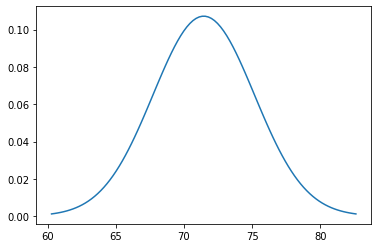

In [6]:
counts_x = compute_counts(X)
pmf_x = compute_pmf(counts_x)
ev_x = compute_ev(pmf_x)
var_x = compute_variance(pmf_x, ev_x)
sigma_x = math.sqrt(var_x)
x = np.linspace(ev_x - 3*sigma_x, ev_x + 3*sigma_x, 100)
plt.plot(x, stats.norm.pdf(x, ev_x, sigma_x))
plt.show()

**d)** What is the probability of observing an age of 80 or higher?  

**e)** Find the 2-dimensional mean $\hat \mu$ and the covariance matrix $\widehat \Sigma$ for these two variables.  

In [7]:
# TODO

**f)** Normalize the data with _range normalization_ to the range $[0, 1]$  

In [8]:
# TODO

**g)** Normalize the data with _standard score normalization_, such that is has mean 0 and standard deviation 1.  

In [9]:
# TODO

## Exercise 2: Robustness
Determine whether the following statements are true or false and explain why.
 - Mean is robust against outliers
 - Median is robust against outliers
 - Standard deviation is robust against outliers

## Exercise 3: More on robustness
Provide an informal definition of when a measure is robust. 

## Exercise 4: Independence analysis
Please explain what the idea of independence analysis is using contingency tables; for which kind of data is this particularly relevant? 

## Exercise 5: Contingency table and $\chi^2$ statistics
In the table below,  assuming that $X_1$ is discretized into three bins, as follows: $[-2, -0.5]$, $[-0.5, 0.5]$, and $[0.5, 2]$.

![Table 3.5](graphics/3.5.png)

Answer the following questions

**a)** Construct the contingency table between the discretized $X_1$ and $X_2$ attributes . Include the marginal counts.  
**b)** Compute the $\chi^2$ statistic between them.  
**c)** Determine whether they are dependent or not at the 5% significance level. Use the $\chi^2$ critical values from Table 3.10.

![Table 3.11](graphics/3.11.png)

## Exercise 6: Working with Metrics

Consider the following situation: 

We know some distances between data points: $d(p_1,p_2)=1$, $d(p_1,p_3)=2$, $d(p_3, p_4)=1$. 
We also know that $d$ is a metric. 

1. What do we know about the remaining distances? 
2. Do we need to compute further distances if we want to find the two points that are most similar to $p_1$? 
3. Can $p_4$ be closer to $p_2$ than $p_3$ is to $p_2$? 

# Optional Exercises

## Exercise 7: Mean absolute deviation 
Define a measure of deviation called _mean absolute deviation_ for a random variable $X$ as follows:

$$
\frac{1}{n} \sum_{i=1}^n |x_i - \mu|
$$

Is this measure robust? Why or why not?

## Exercise 8: Correlation

Consider the table below. Assume that both the attributes $X$ and $Y$ are numeric, and the
table represents the entire population. If we know that the correlation between $X$
and $Y$ is zero, what can you infer about the values of $Y$? (Find a relationship between a, b and c)

|$X$ | $Y$ |
|:---:|:---:|
|$1$|$a$|
|$0$|$b$|
|$1$|$c$|
|$0$|$a$|
|$0$|$c$|
|$1$|$b$|

# Exercise 9: 3-way contingency table

Consider the 3-way contingency table for attributes $X$,$Y$,$Z$ shown in the table below.
Compute the $\chi^2$ metric for the correlation between $Y$ and $Z$. Are they dependent
or independent at the 95% confidence level? See Table 3.10 above for $\chi^2$ values.

![Table 3.9](graphics/3.9.png)

# Exercise 10: Mixed data

Consider the "mixed" data given in the table below. Here $X_1$ is a numeric attribute and
$X_2$ is a categorical one. Assume that the domain of $X_2$ is given as $dom(X_2) = \{a, b\}$.
Answer the following questions.
**a)** What is the mean vector for this dataset?  
**b)** What is the covariance matrix?  

![Table 3.5](graphics/3.5.png)

